In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_datareader import data as web
import warnings
warnings.filterwarnings("ignore")

# prices = pd.DataFrame()
# tickers = ['WEGE3.SA', '^BVSP']
# for i in tickers:
#     prices[i] = web.get_data_yahoo(i,'01/01/2008')['Adj Close']
wege3 = web.get_data_yahoo("WEGE3.SA",'01/01/2022')

In [17]:
wege3.tail()
wege3.describe()

,High,Low,Open,Close,Volume,Adj Close
count,184.000000,184.000000,184.000000,184.000000,1.840000e+02,184.000000
mean,29.802609,28.815163,29.312554,29.278913,8.513410e+06,29.041338
std,2.738470,2.665634,2.710305,2.701786,3.464075e+06,2.656321
min,23.629999,22.820000,23.420000,22.830000,3.199600e+06,22.643532
25%,27.059999,26.127500,26.625000,26.577500,6.150625e+06,26.413560
50%,30.370000,29.355000,29.825000,29.830000,7.926250e+06,29.610840
75%,31.655001,30.605000,31.015000,31.129999,1.019098e+07,30.895577
max,35.830002,35.090000,35.400002,35.380001,2.981270e+07,35.091030


In [3]:
prices.rename(columns ={'ITUB3.SA':'ITUB', 'BBDC3.SA':'BBDC','BBAS3.SA':'BBAS','SANB3.SA':'SANB', '^BVSP':'IBOV'},inplace = True)
prices['IBOV'] = prices['IBOV']/1000
prices.reset_index(inplace = True)

In [4]:
prices.dropna(subset = ['IBOV'], inplace = True)
prices.IBOV.isnull().sum()

0

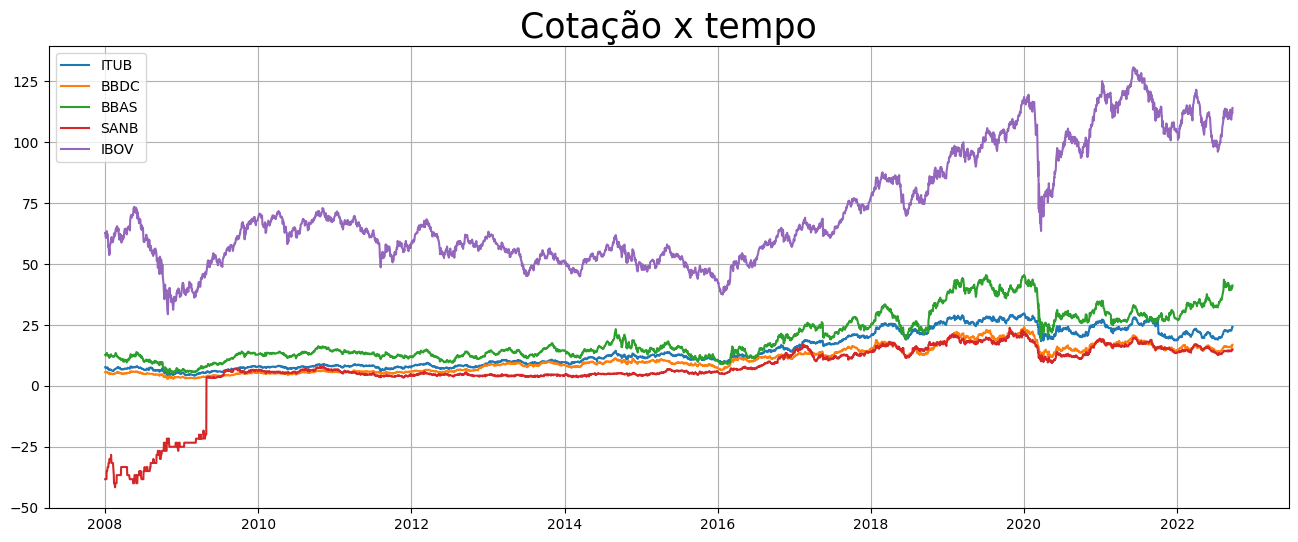

In [5]:
tickers = list(prices.drop(['Date'], axis = 1).columns)
plt.figure(figsize=(16,6))

for i in tickers:
        plt.plot(prices['Date'], prices[i])
plt.legend(tickers)
plt.grid()
plt.title("Cotação x tempo", fontsize = 25)
plt.show()

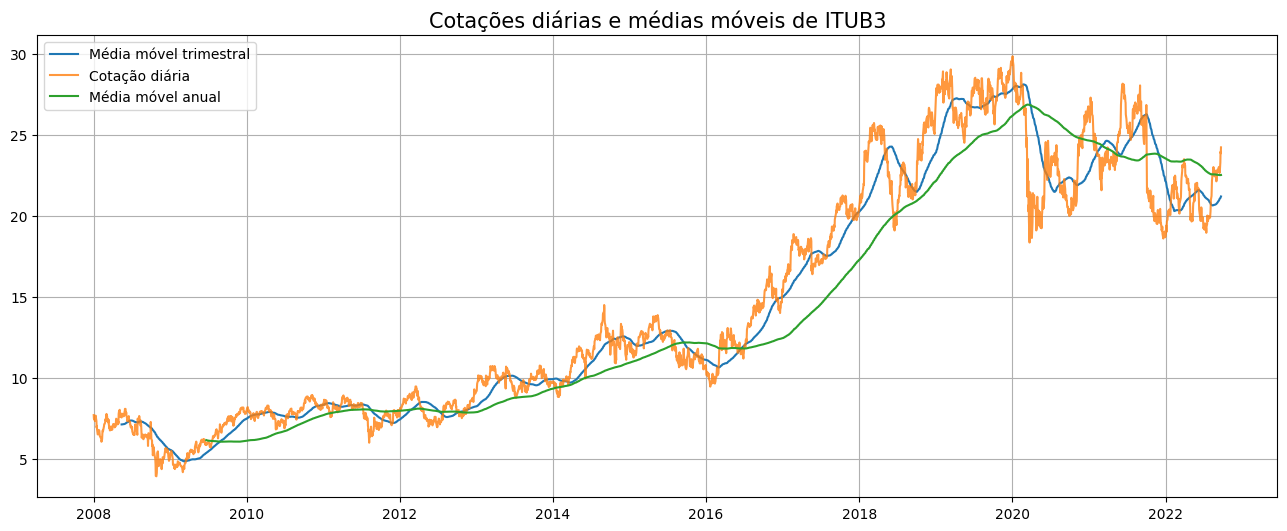

In [6]:
plt.figure(figsize=(16,6))
plt.plot(prices['Date'],prices['ITUB'].rolling(window = 90).mean())
plt.plot(prices['Date'], prices['ITUB'], alpha = 0.8)
plt.plot(prices['Date'],prices['ITUB'].rolling(window = 365).mean())
plt.grid()
plt.title('Cotações diárias e médias móveis de ITUB3', fontsize = 15)
plt.legend(['Média móvel trimestral','Cotação diária','Média móvel anual'])
plt.show()

In [7]:
import csv
import requests
import time
from datetime import datetime
from bs4 import BeautifulSoup

url = 'https://www.fundsexplorer.com.br/ranking'

# Data Cleansing
# 'R$' => ''
# '%' => ''
# '.0' => ''
# '.' => ''
# ',' => '.'
# 'N/A' => ''

print("Starting...{}".format(datetime.now()))

response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

data = []
table = soup.find(id="table-ranking")

table_head = table.find('thead')

rows = table_head.find_all('tr')
for row in rows:
    cols = row.find_all('th')
    colsd = [ele.get_text(separator=" ").strip() for ele in cols]
    data.append([ele for ele in colsd])

table_body = table.find('tbody')

rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    colsd = [ele.text.replace('R$','').replace('%','').replace('.0','').replace('.','').replace('N/A','').replace(',','.').strip() for ele in cols]
    data.append([ele for ele in colsd])

file = open("fii.csv", "w")

wtr = csv.writer(file, delimiter=';', lineterminator='\n')
for x in data : wtr.writerow(x)

file.close()

print("Finish...{}".format(datetime.now()))

time.sleep(1)

Starting...2022-09-23 10:17:40.601255
Finish...2022-09-23 10:17:42.823774


<AxesSubplot: >

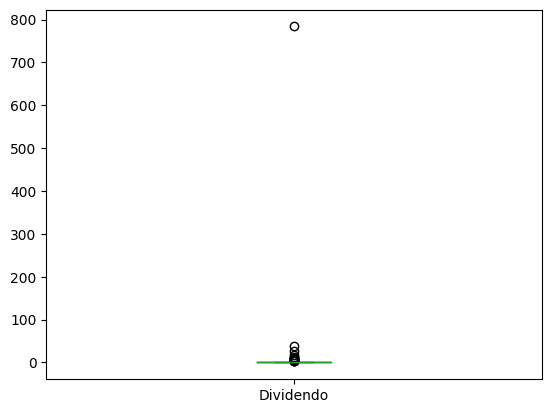

In [12]:
from tkinter import Y
import pandas as pd
import numpy as np
import matplotlib as plt
import math

df = pd.read_csv("./fii.csv", sep=";")
# df.set_index("Código do fundo").loc["VGHF11"]

df = df[df["Preço Atual"].notna().values]
df = df[df["Dividendo"].notna().values]

df["Magic Number"] = df["Preço Atual"]/df["Dividendo"]
df["Magic Number"] = df["Magic Number"].apply(np.ceil)
df["Magic Number"].replace([np.inf, -np.inf], np.nan, inplace=True)

df = df[df["Magic Number"].notna().values]

df = df.sort_values(by="Magic Number", ascending=True)

df["Dividendo"].plot(kind="box")